# Objective : Linnerud Weight Regression
# EDA - Python
# Insights - Patterns
#  Regression

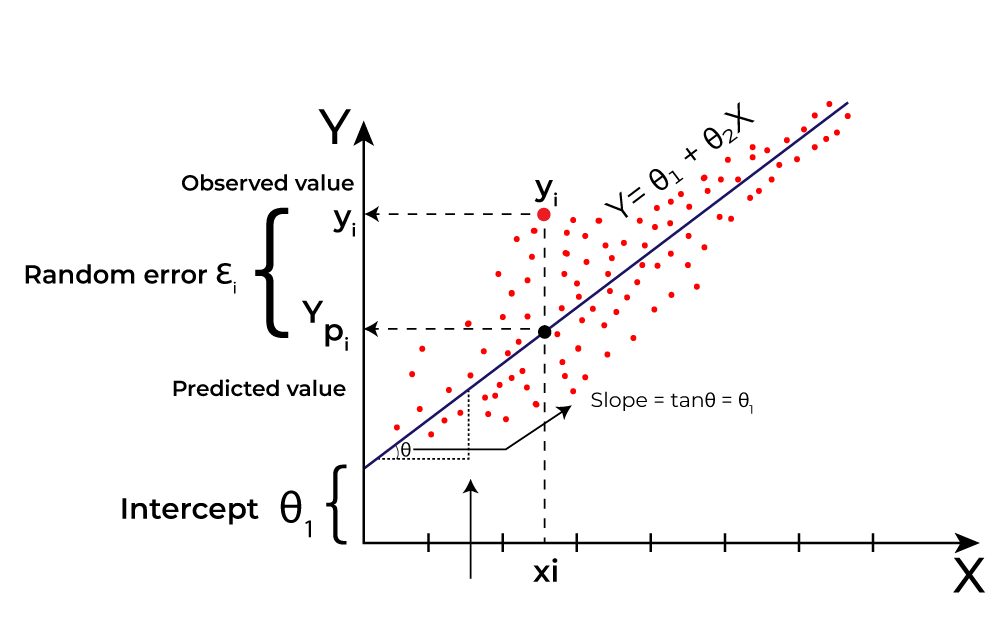

- The Linnerud dataset is a multi-output regression dataset. 
- It consists of three exercise (data) and three physiological (target) variables collected
- from twenty middle-aged men in a fitness club:

# 1. Import Python Modules

In [28]:
# Load necessary python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 2.  Load Cars Price Dataset

In [29]:
file_path = r"linnerud_dataset.csv"
gym_df = pd.read_csv(file_path)
gym_df

,Chins,Situps,Jumps,target_weight
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,189.0
2,12.0,101.0,101.0,193.0
3,12.0,105.0,37.0,162.0
4,13.0,155.0,58.0,189.0
5,4.0,101.0,42.0,182.0
6,8.0,101.0,38.0,211.0
7,6.0,125.0,40.0,167.0
8,15.0,200.0,40.0,176.0
9,17.0,251.0,250.0,154.0


# 3. Basic Inspection on dataset

In [30]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table summary ")
    print(table.describe())

basic_inspection_dataset(gym_df)

top 5 rows - using head
   Chins  Situps  Jumps  target_weight
0    5.0   162.0   60.0          191.0
1    2.0   110.0   60.0          189.0
2   12.0   101.0  101.0          193.0
3   12.0   105.0   37.0          162.0
4   13.0   155.0   58.0          189.0

bottom 5 rows using tail
    Chins  Situps  Jumps  target_weight
15   12.0   210.0  120.0          202.0
16    4.0    60.0   25.0          176.0
17   11.0   230.0   80.0          157.0
18   15.0   225.0   73.0          156.0
19    2.0   110.0   43.0          138.0

numbers of samples and columns
(20, 4)

numbers of samples 
20

numbers of entries in the data frame
80

Columns Names
Index(['Chins', 'Situps', 'Jumps', 'target_weight'], dtype='object')

Columns dtypes
Chins            float64
Situps           float64
Jumps            float64
target_weight    float64
dtype: object

Dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dty

# 4. Handling Missing Values - Cat

In [31]:
# There is no missing values in cat columns

# 5. Categorical- Variable - Analysis -Using Pipeline

In [32]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%0.2f%%', startangle=40)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

In [33]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(gym_df)

# 6. Handling Missing Values in Numerical Columns

In [34]:
# There is no missing values in num columns
gym_df.isna().sum()

Chins            0
Situps           0
Jumps            0
target_weight    0
dtype: int64

# 7. Numerical - Variables - Analysis - Using -Pipeline

In [35]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
               
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()
        


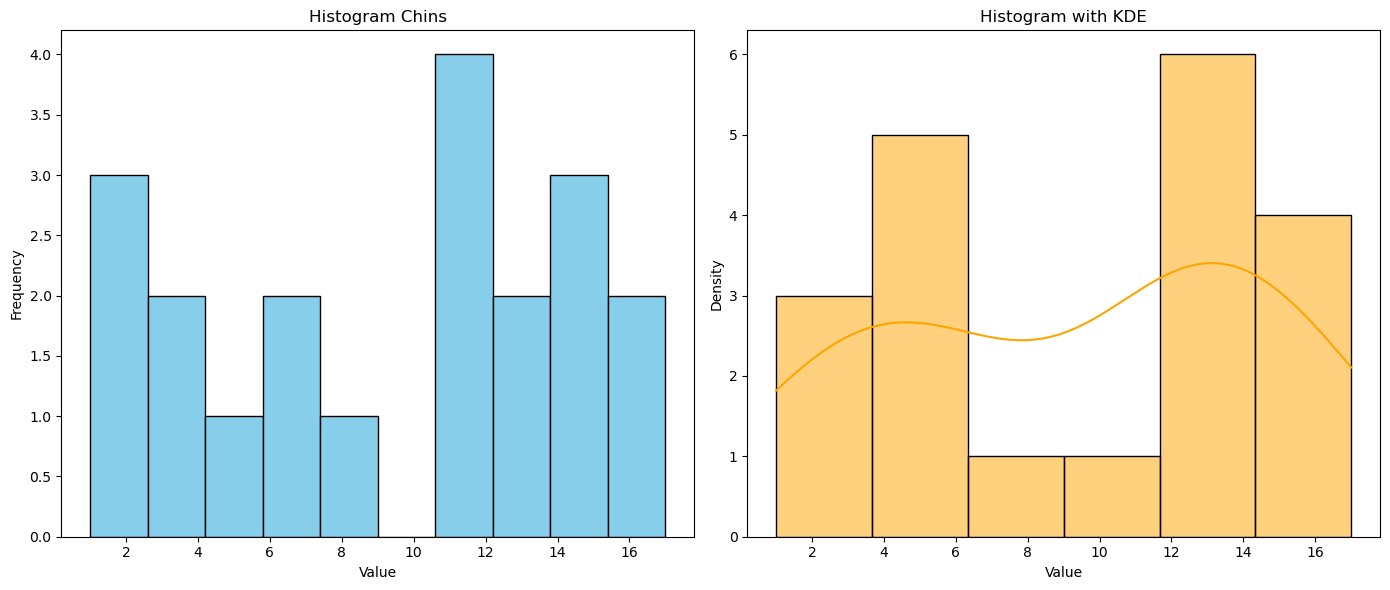

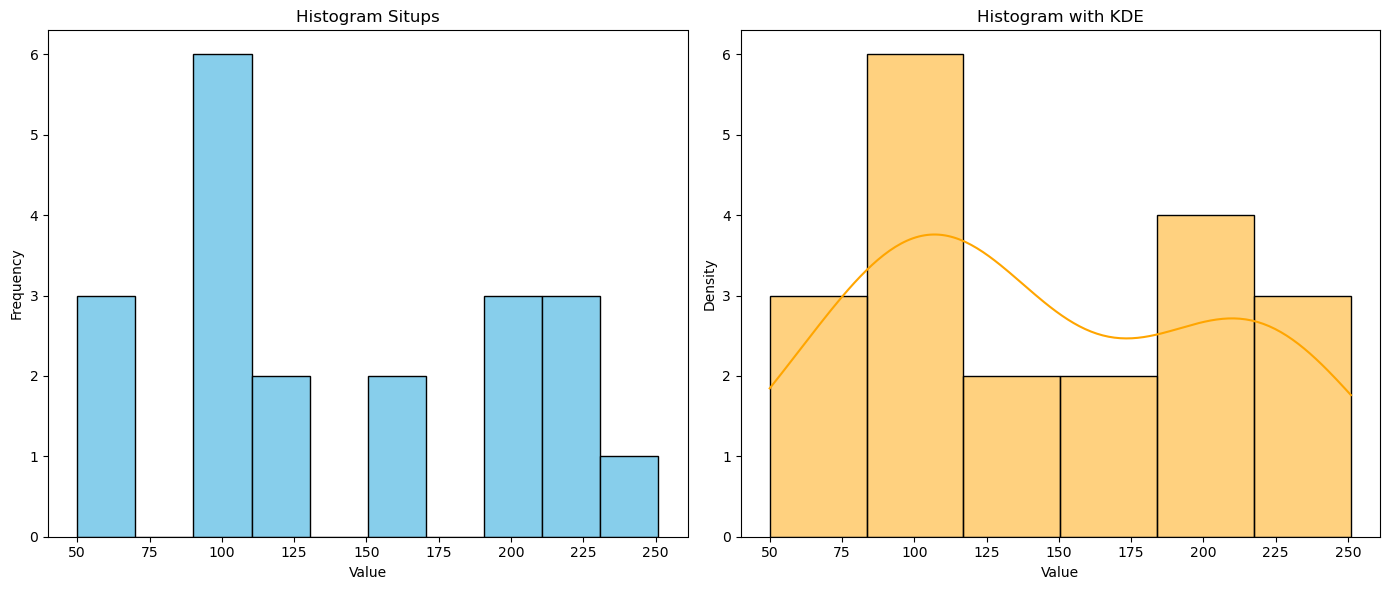

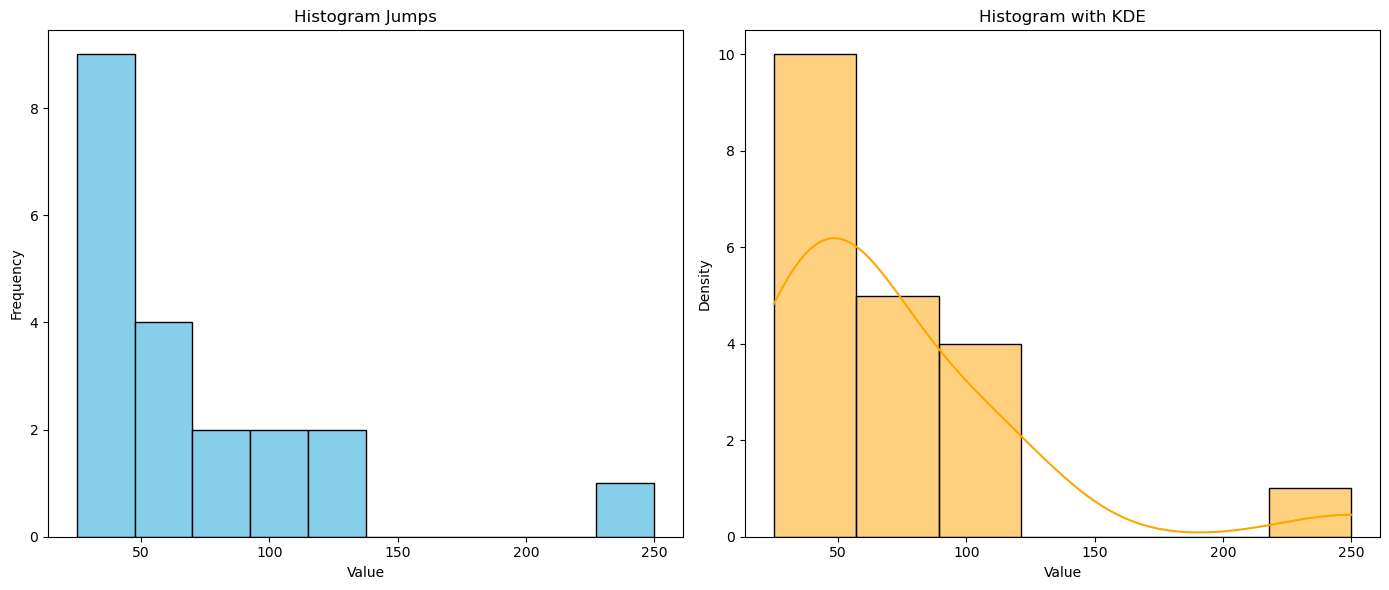

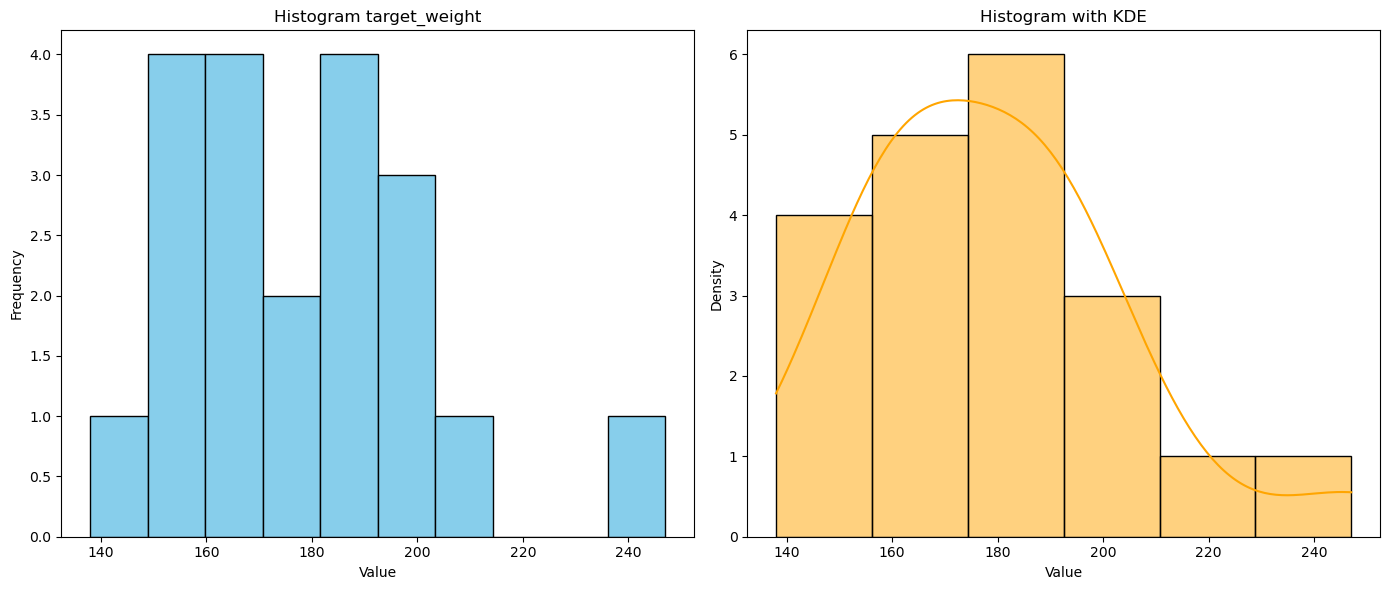

In [36]:
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])


# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(gym_df)

 # 8. Numerical - Variables -Outliers Analysis

# 9. Bi Variate Analysis

## Cat Vs Num

## Num Vs Num

In [37]:
gym_df.columns

Index(['Chins', 'Situps', 'Jumps', 'target_weight'], dtype='object')

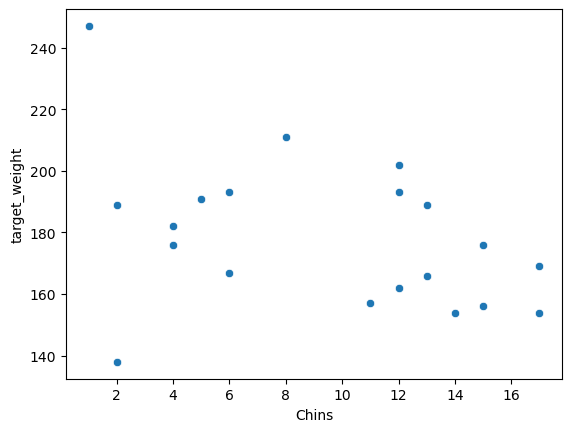

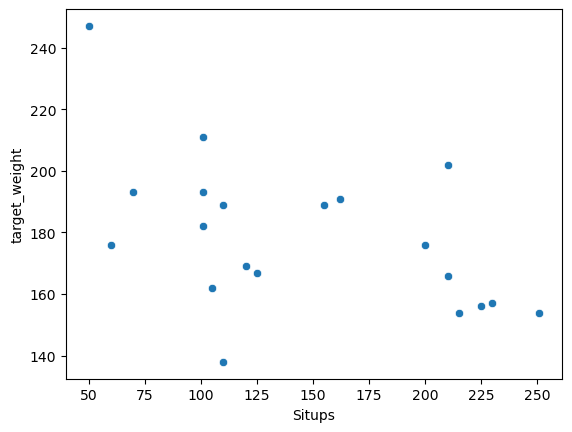

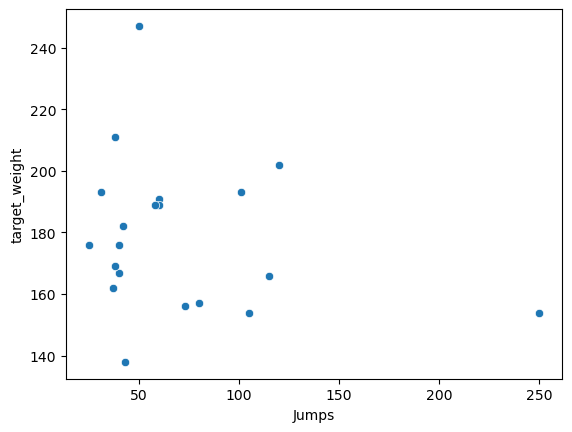

In [38]:
#print(cars_price_df.columns)
for num_var in [ 'Chins', 'Situps','Jumps']:
    sns.scatterplot(data=gym_df,y='target_weight',x=num_var)
    plt.show()

In [39]:
 gym_df.corr()

,Chins,Situps,Jumps,target_weight
Chins,1.000000,0.695727,0.495760,-0.389694
Situps,0.695727,1.000000,0.669206,-0.493084
Jumps,0.495760,0.669206,1.000000,-0.226296
target_weight,-0.389694,-0.493084,-0.226296,1.000000


# 10. Data Transformation

In [40]:
gym_df["Chins_log"]=np.log1p(gym_df["Chins"])
gym_df["Situps_log"]=np.log1p(gym_df["Situps"])
gym_df["Jumps_log"]=np.log1p(gym_df["Jumps"])
gym_df["target_weight_log"]=np.log1p(gym_df["target_weight"])

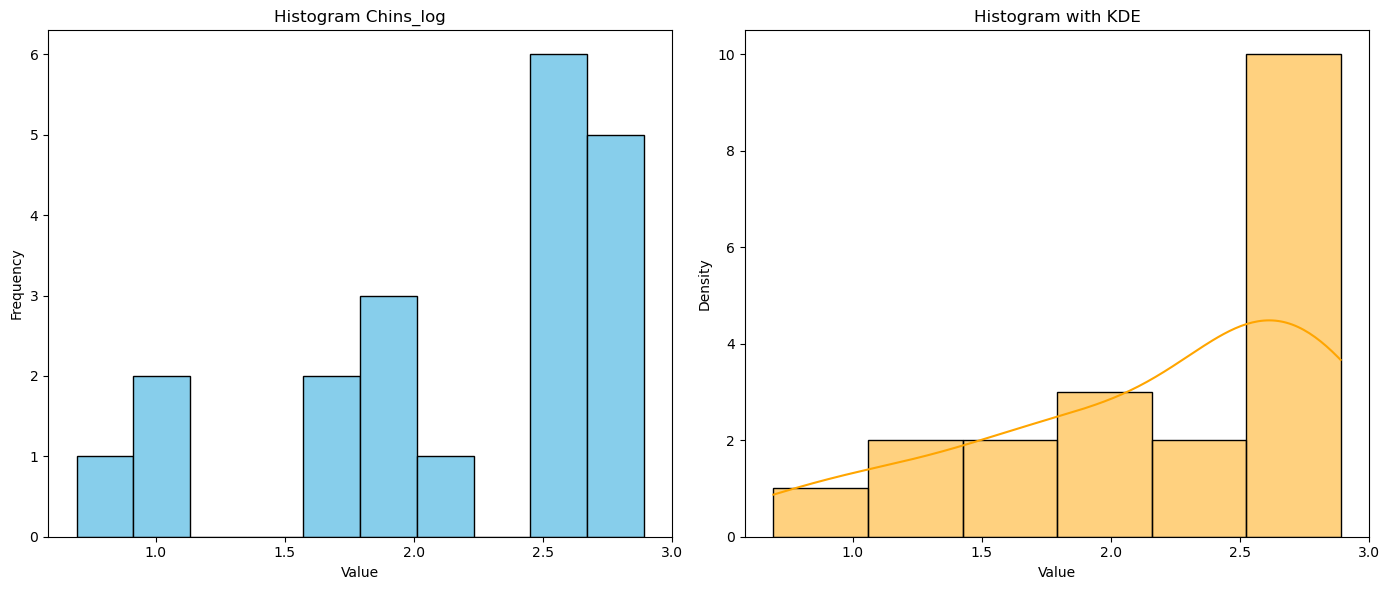

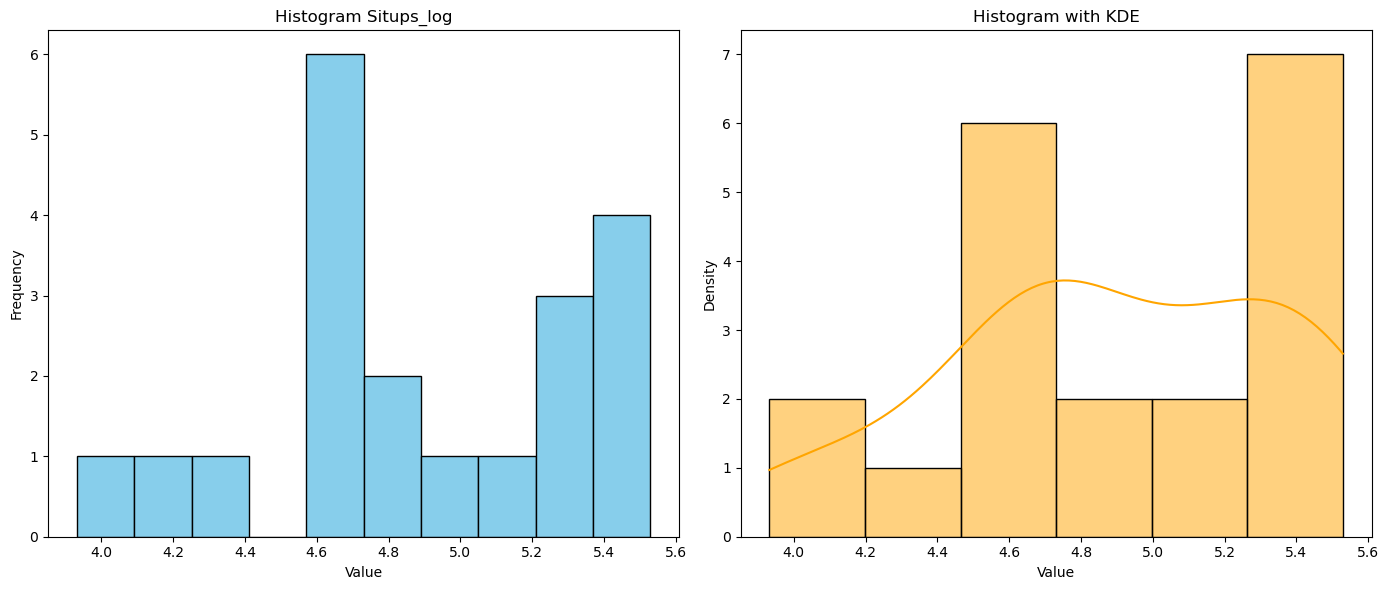

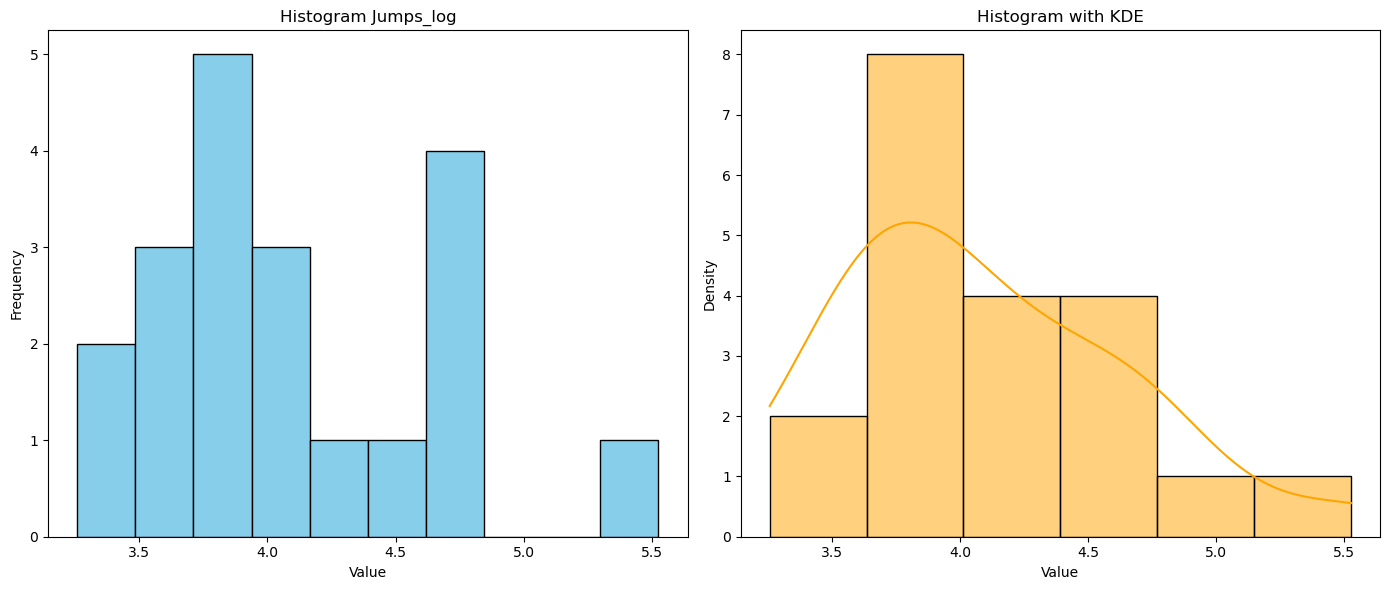

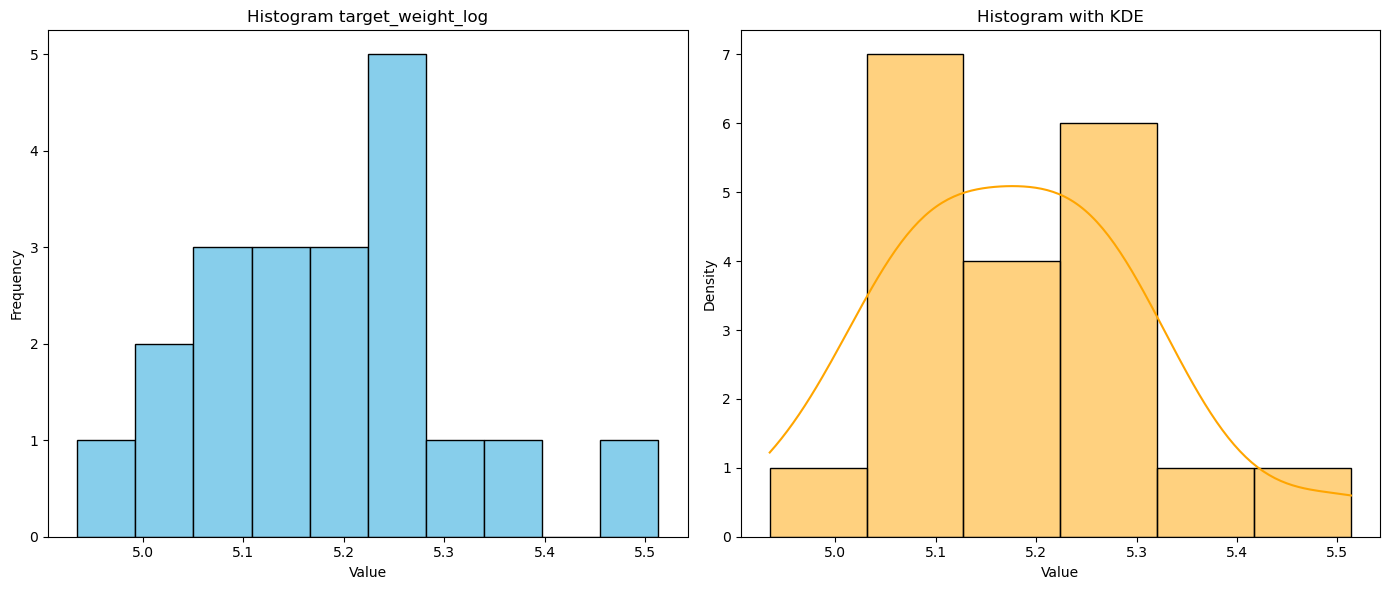

In [41]:
gym_num_df = gym_df[['Chins_log', 'Situps_log', 'Jumps_log','target_weight_log']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(gym_num_df)

In [42]:
gym_df["Chins_sqrt"]=np.sqrt(gym_df["Chins"])
gym_df["Situps_sqrt"]=np.sqrt(gym_df["Situps"])
gym_df["Jumps_sqrt"]=np.sqrt(gym_df["Jumps"])
gym_df["target_weight_sqrt"]=np.sqrt(gym_df["target_weight"])

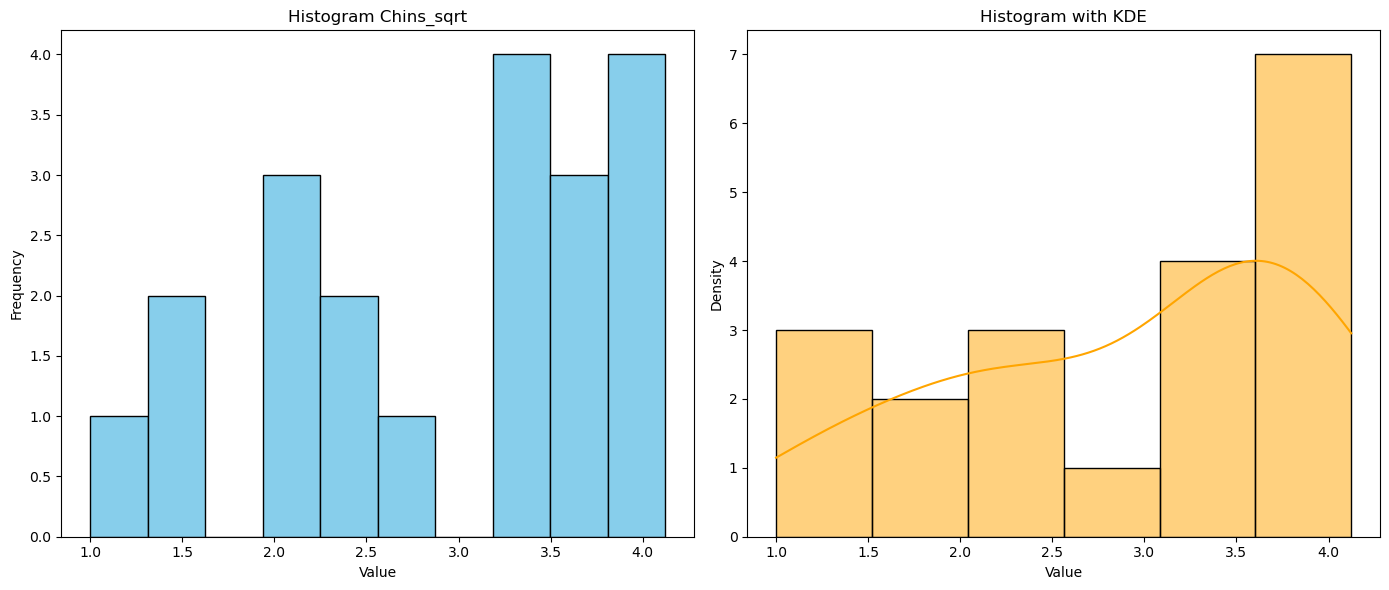

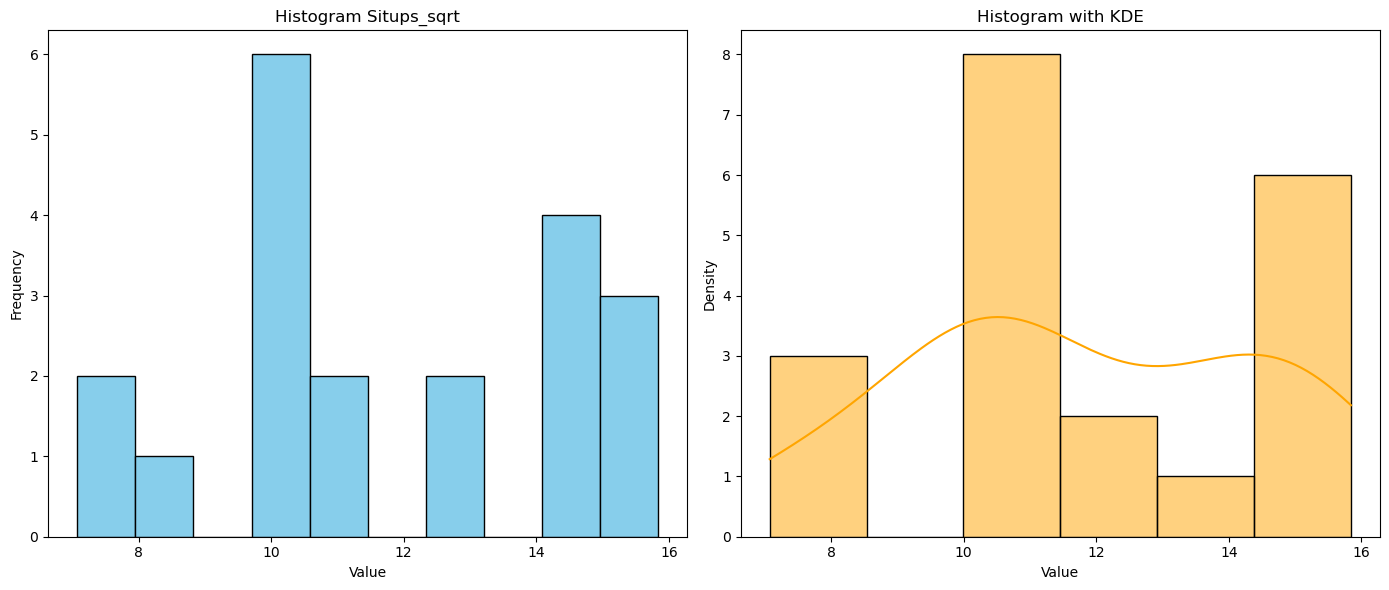

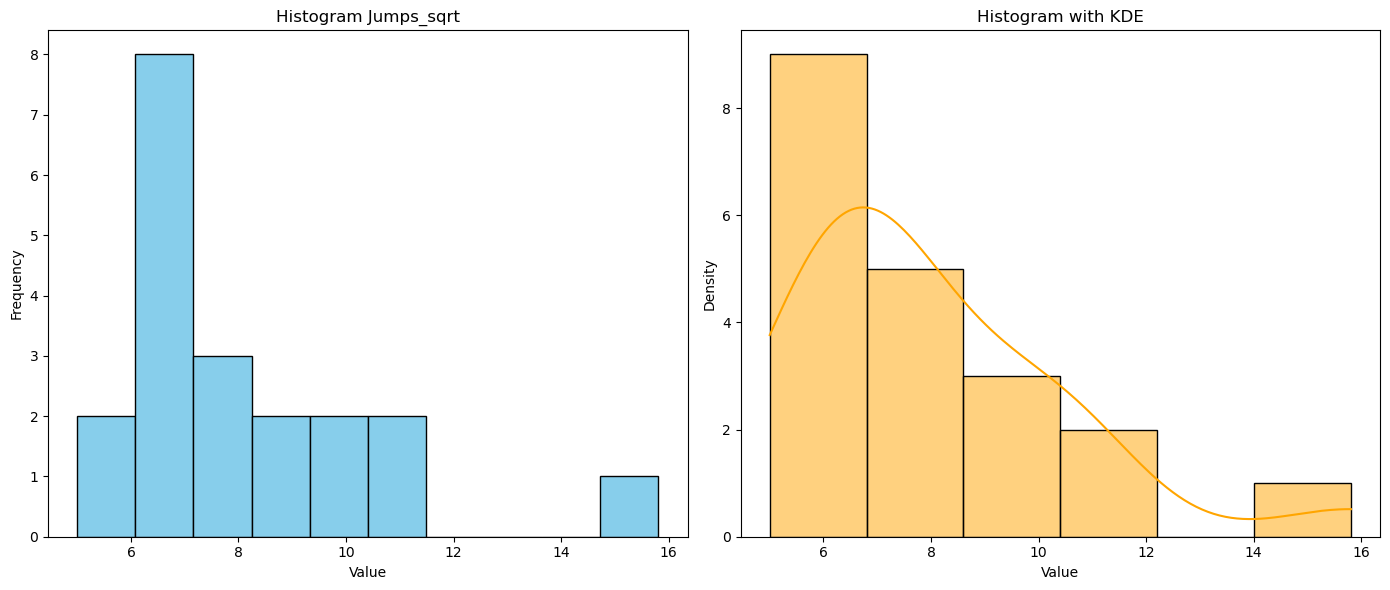

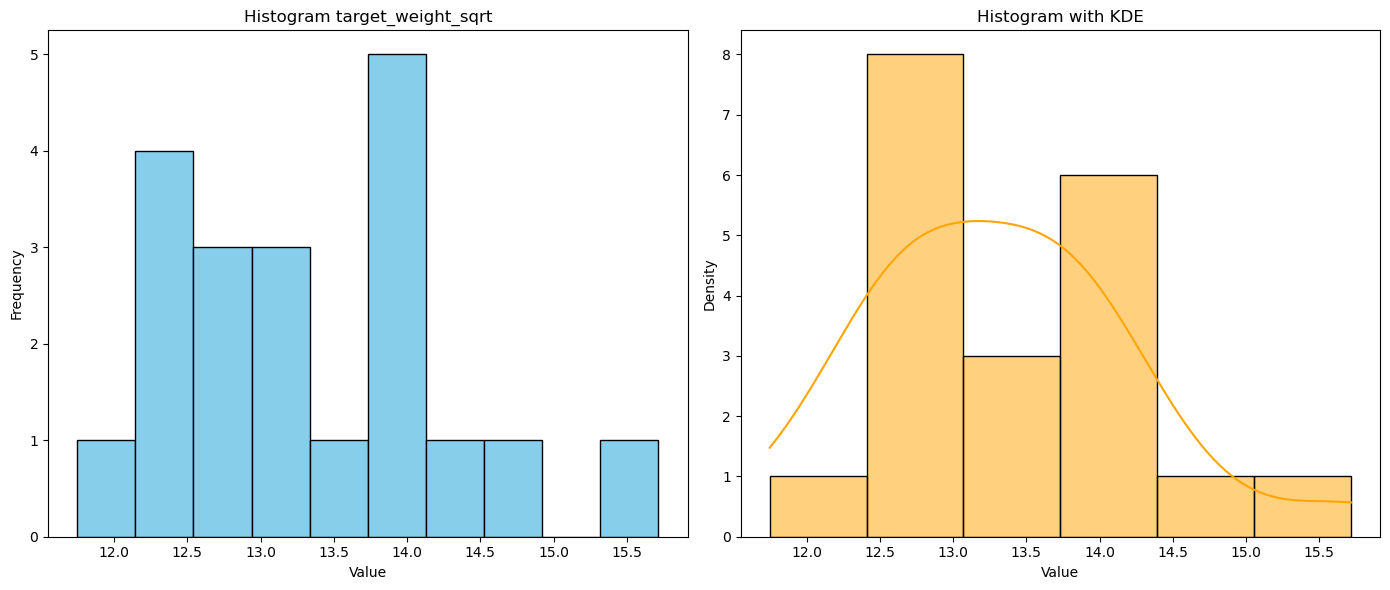

In [43]:
gym_num_df = gym_df[['Chins_sqrt', 'Situps_sqrt', 'Jumps_sqrt',"target_weight_sqrt"]].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(gym_num_df)

# 11. Standization - Normalization

In [44]:
gym_df

,Chins,Situps,Jumps,target_weight,Chins_log,Situps_log,Jumps_log,target_weight_log,Chins_sqrt,Situps_sqrt,Jumps_sqrt,target_weight_sqrt
0,5.0,162.0,60.0,191.0,1.791759,5.093750,4.110874,5.257495,2.236068,12.727922,7.745967,13.820275
1,2.0,110.0,60.0,189.0,1.098612,4.709530,4.110874,5.247024,1.414214,10.488088,7.745967,13.747727
2,12.0,101.0,101.0,193.0,2.564949,4.624973,4.624973,5.267858,3.464102,10.049876,10.049876,13.892444
3,12.0,105.0,37.0,162.0,2.564949,4.663439,3.637586,5.093750,3.464102,10.246951,6.082763,12.727922
4,13.0,155.0,58.0,189.0,2.639057,5.049856,4.077537,5.247024,3.605551,12.449900,7.615773,13.747727
5,4.0,101.0,42.0,182.0,1.609438,4.624973,3.761200,5.209486,2.000000,10.049876,6.480741,13.490738
6,8.0,101.0,38.0,211.0,2.197225,4.624973,3.663562,5.356586,2.828427,10.049876,6.164414,14.525839
7,6.0,125.0,40.0,167.0,1.945910,4.836282,3.713572,5.123964,2.449490,11.180340,6.324555,12.922848
8,15.0,200.0,40.0,176.0,2.772589,5.303305,3.713572,5.176150,3.872983,14.142136,6.324555,13.266499
9,17.0,251.0,250.0,154.0,2.890372,5.529429,5.525453,5.043425,4.123106,15.842980,15.811388,12.409674


# 12. Convert Cat - to - Numerical Columns

## VIF

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
# the independent variables set 
X = gym_df[['Chins','Situps','Jumps']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

  feature        VIF
0   Chins   8.403068
1  Situps  12.220492
2   Jumps   5.353462


In [46]:
gym_df.columns

Index(['Chins', 'Situps', 'Jumps', 'target_weight', 'Chins_log', 'Situps_log',
       'Jumps_log', 'target_weight_log', 'Chins_sqrt', 'Situps_sqrt',
       'Jumps_sqrt', 'target_weight_sqrt'],
      dtype='object')

In [47]:
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chins               20 non-null     float64
 1   Situps              20 non-null     float64
 2   Jumps               20 non-null     float64
 3   target_weight       20 non-null     float64
 4   Chins_log           20 non-null     float64
 5   Situps_log          20 non-null     float64
 6   Jumps_log           20 non-null     float64
 7   target_weight_log   20 non-null     float64
 8   Chins_sqrt          20 non-null     float64
 9   Situps_sqrt         20 non-null     float64
 10  Jumps_sqrt          20 non-null     float64
 11  target_weight_sqrt  20 non-null     float64
dtypes: float64(12)
memory usage: 2.0 KB


# 13. Inferential statistics test

In [48]:
import statsmodels.api as sm
X = sm.add_constant(gym_df[['Chins', 'Situps', 'Jumps']])

# Fit a linear regression model
model = sm.OLS(gym_df['target_weight'], X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Calculate the R2 score
print(f"R2 score: {results.rsquared}")


                            OLS Regression Results                            
Dep. Variable:          target_weight   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     1.952
Date:                Fri, 22 Mar 2024   Prob (F-statistic):              0.162
Time:                        13:53:12   Log-Likelihood:                -88.876
No. Observations:                  20   AIC:                             185.8
Df Residuals:                      16   BIC:                             189.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        208.2335     13.451     15.481      0.0

# 14. ML - Linear Regression Model

# Conclusions
1. Dataset is twoo samll
2. Based on the inputs - i can not predict the target wt 